In [110]:

import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions/CO2 Emissions.csv


In [111]:
df=pd.read_csv("/kaggle/input/co2-emissions/CO2 Emissions.csv")
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [113]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [114]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

# ****Correlation of Features

In [115]:
corel= df.corr()
corel

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


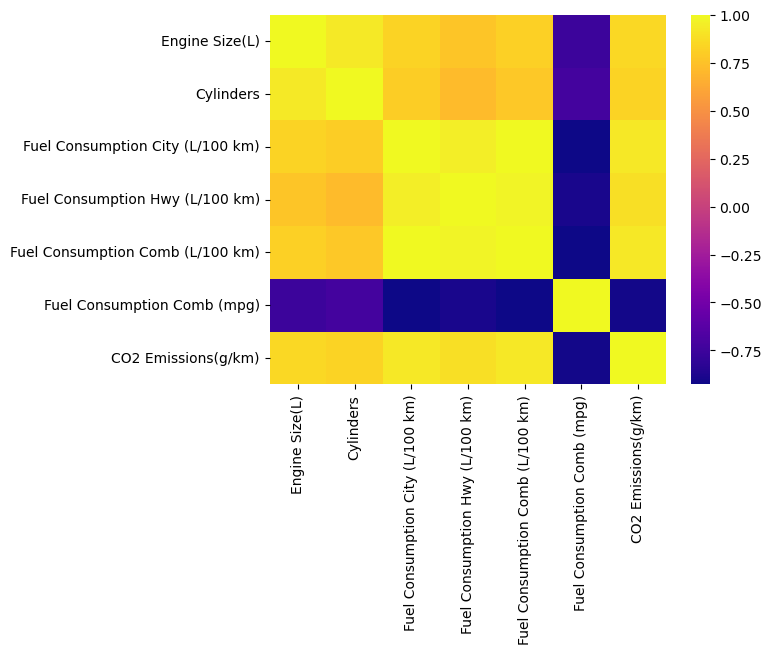

In [116]:
sns.heatmap(corel,cmap='plasma')
plt.show()

# ****Exploratory Data Analysis

# Relationship between specific variables 

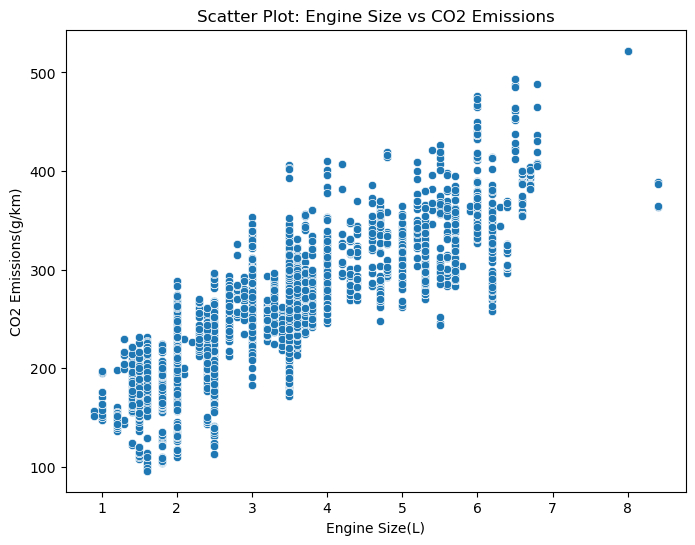

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.title('Scatter Plot: Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

#  Different categories

Fuel Type
D    237.548571
E    275.091892
N    213.000000
X    235.119329
Z    266.043410
Name: CO2 Emissions(g/km), dtype: float64


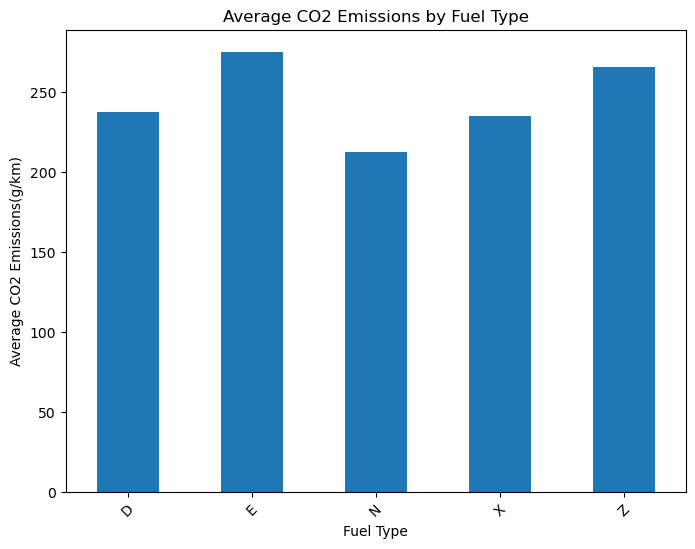

In [118]:
# Average CO2 Emissions by Fuel Type
avg_co2_by_fuel = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()
print(avg_co2_by_fuel)

plt.figure(figsize=(8, 6))
avg_co2_by_fuel.plot(kind='bar')
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions(g/km)')
plt.xticks(rotation=45)
plt.show()


# Distribution of CO2 Emissions

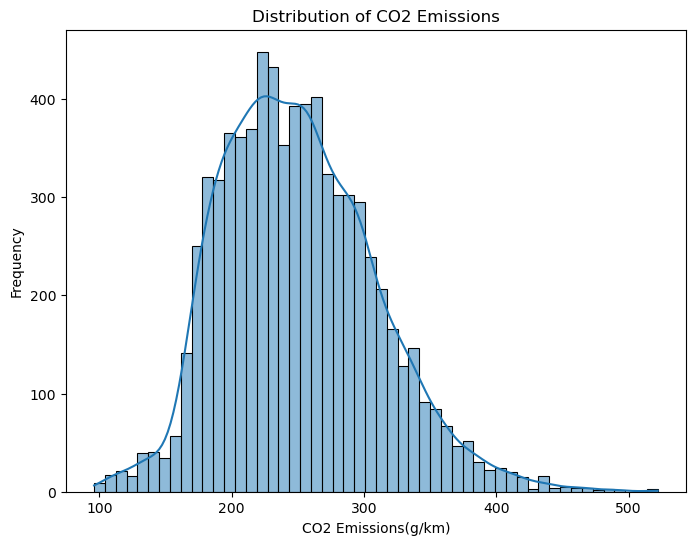

In [119]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.show()

# Fuel Consumption by Vehicle Class

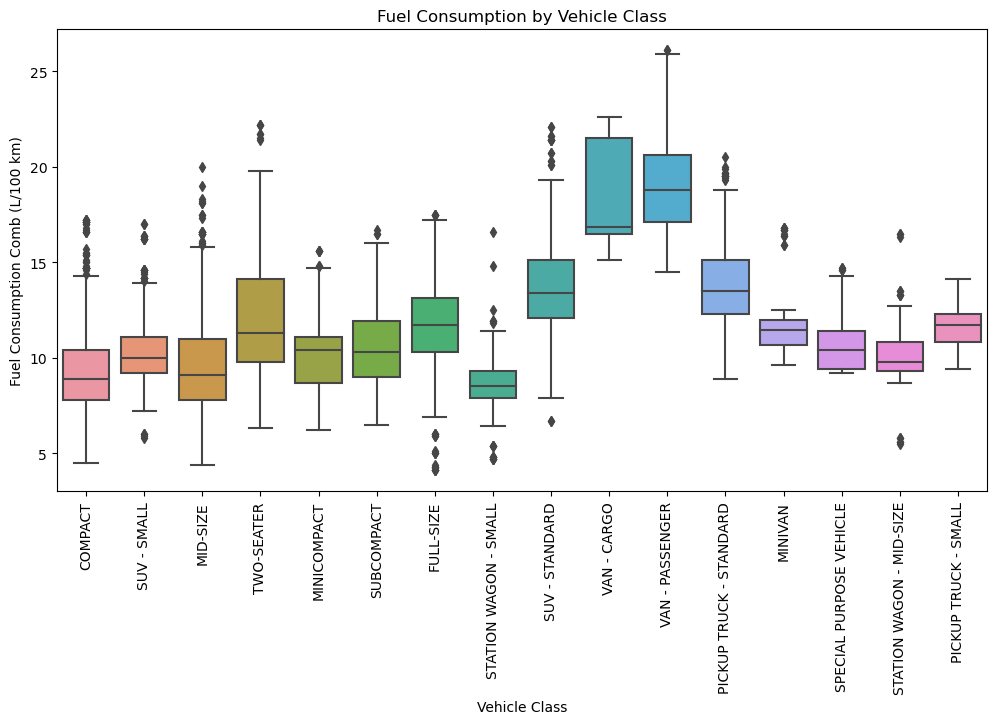

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.xticks(rotation=90)
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.show()

# Distribution Comparison

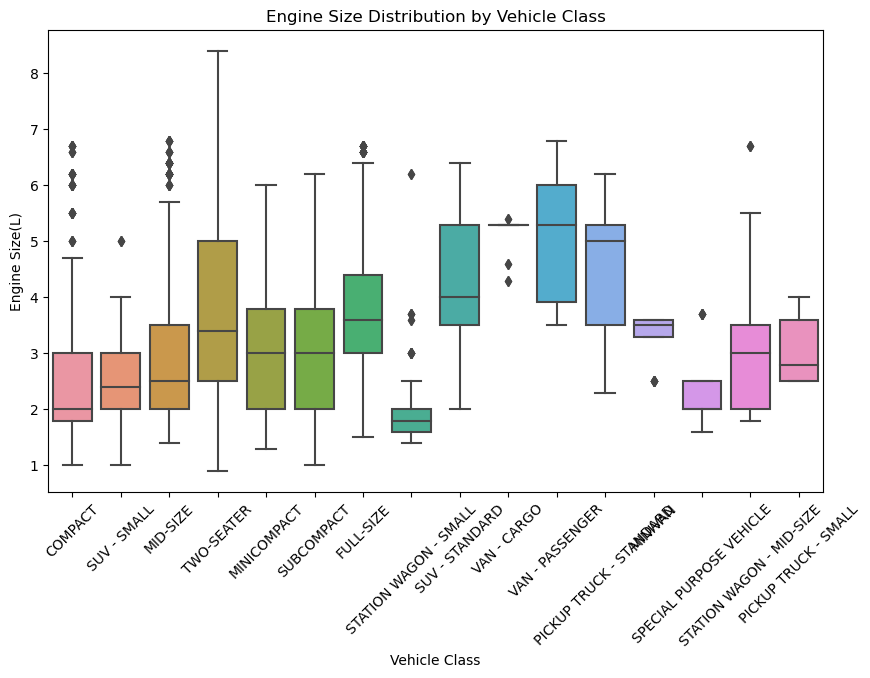

In [121]:
# Engine Size by Vehicle Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Class', y='Engine Size(L)', data=df)
plt.xticks(rotation=45)
plt.title('Engine Size Distribution by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Engine Size(L)')
plt.show()


# Multivariate Analysis

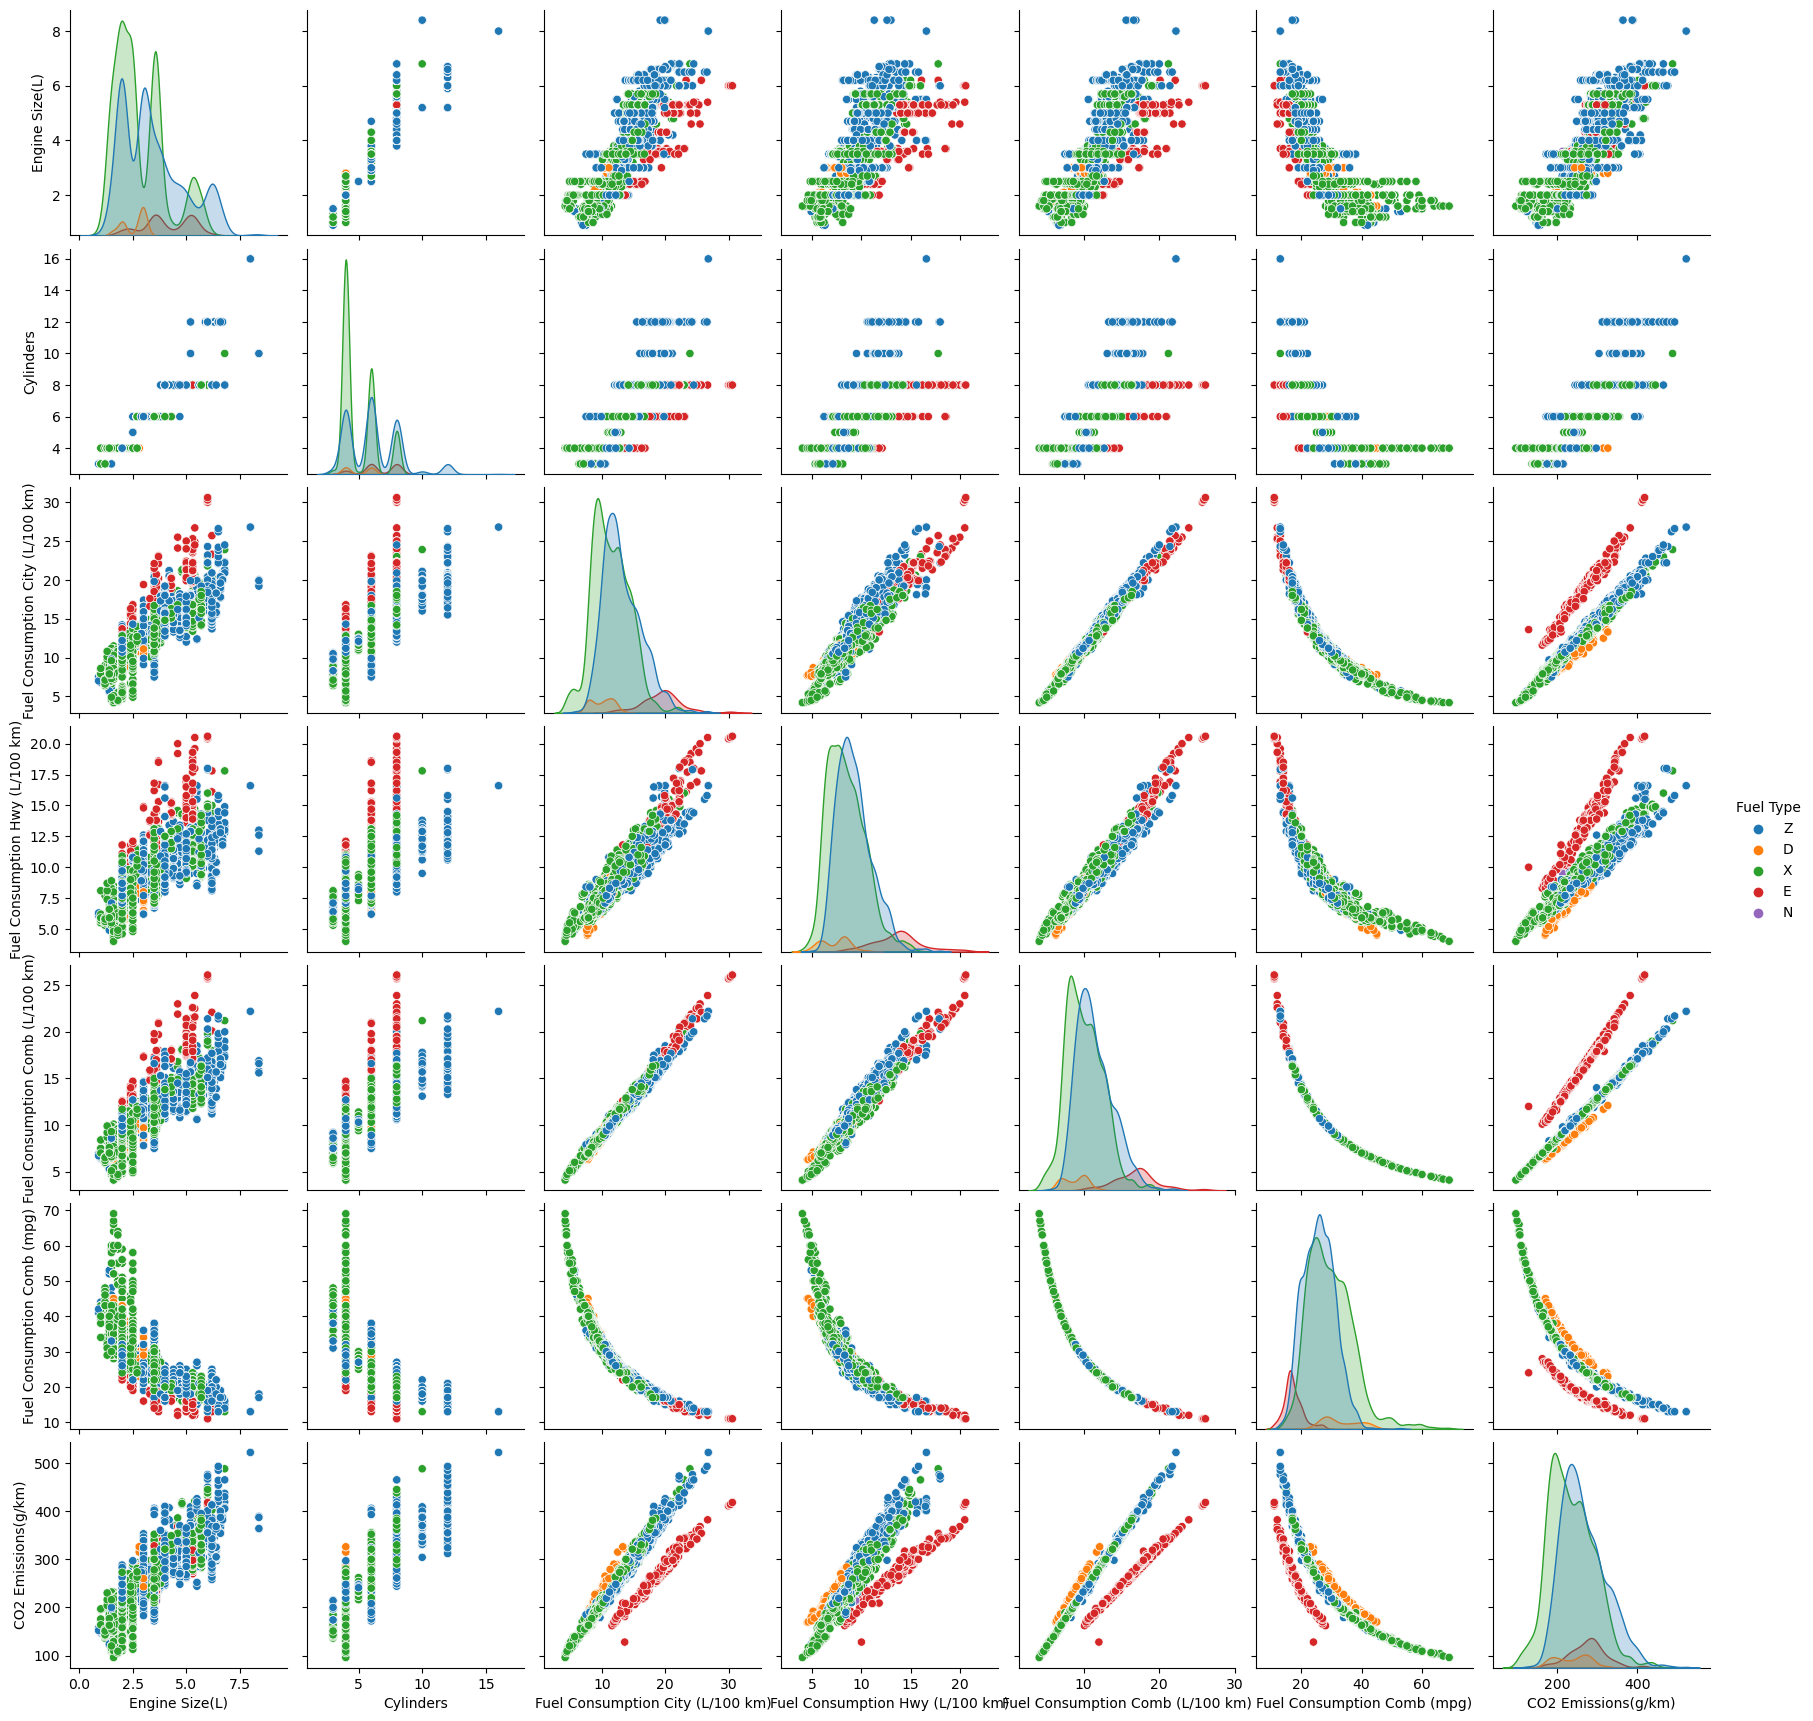

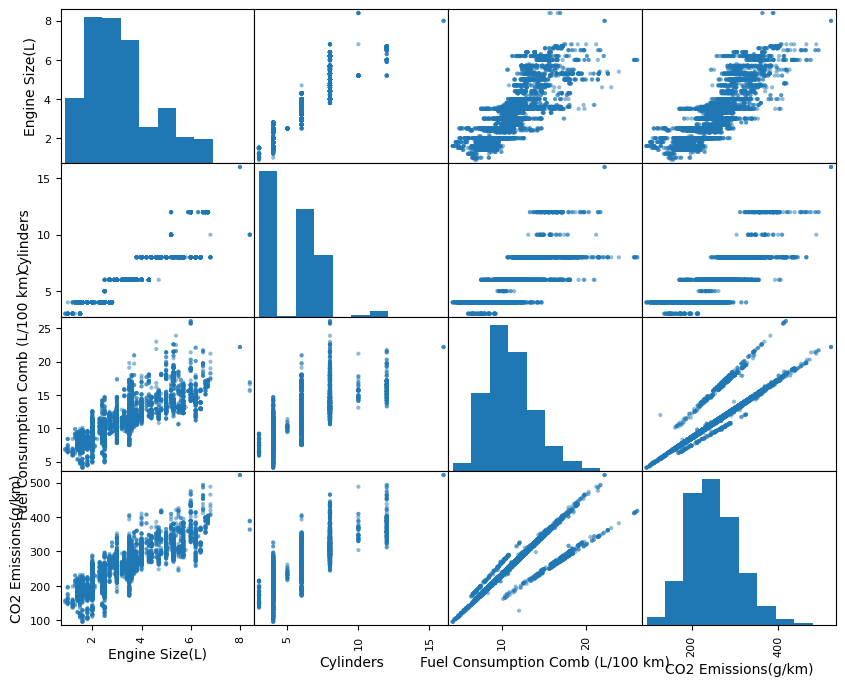

In [122]:
sns.pairplot(df, hue='Fuel Type')
plt.show()

selected_vars = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
pd.plotting.scatter_matrix(df[selected_vars], figsize=(10, 8))
plt.show()


# Outlier Detection

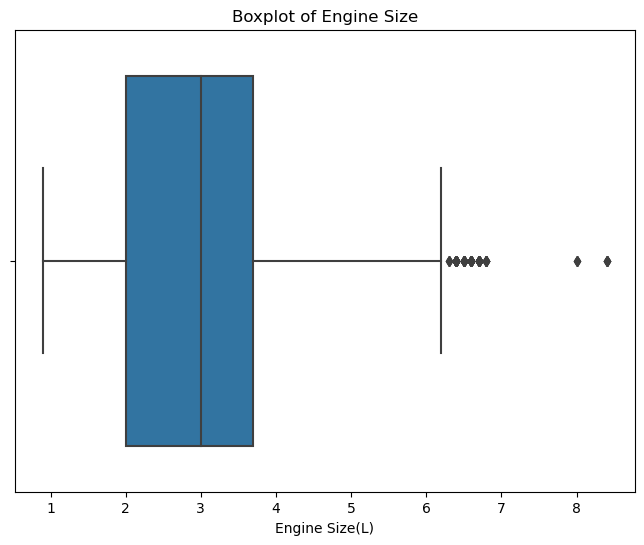

In [123]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Engine Size(L)', data=df)
plt.title('Boxplot of Engine Size')
plt.xlabel('Engine Size(L)')
plt.show()


# ****Modelling

# Defining Features

In [124]:
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

# Splitting data

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                  'Fuel Consumption Comb (mpg)']

# Preprocessing 

In [127]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# Initialize models

In [128]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Model Fitting

In [129]:
results = {}
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}


# Results

In [130]:
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"Mean Absolute Error: {metrics['MAE']:.2f}")
    print("=" * 30)

Model: Linear Regression
Mean Squared Error: 30.00
Mean Absolute Error: 3.24
Model: Decision Tree
Mean Squared Error: 14.27
Mean Absolute Error: 1.86
Model: Random Forest
Mean Squared Error: 12.32
Mean Absolute Error: 1.83
Model: Support Vector Machine
Mean Squared Error: 406.86
Mean Absolute Error: 9.54


# ****Saving As Output Csv

In [131]:

results_df = pd.DataFrame(results)
results_df.to_csv('model_results.csv', index=False)

print("Model results saved to 'model_results.csv'")


Model results saved to 'model_results.csv'
